# Linear Regression in TensorFlow

In this code snippet you will implement a linear regression for house prices. As input you have the size of the single houses and their corresponding prices. 

Tasks:
- Construct the linear regression
- define the error function
- select an optimizer and create a train op
- run the snippet

Help:

use the TensorFlow API Documentation https://www.tensorflow.org/api_docs/

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data as numpy arrays

x_input_train = np.asarray([ 2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,
  1380,  1494,  1940,  2000,  1890,  4478,  1268,  2300,
  1320,  1236,  2609,  3031,  1767,  1888,  1604,  1962,
  3890,  1100,  1458,  2526,  2200,  2637,  1839,  1000,
  2040,  3137,  1811,  1437,  1239,  2132,  4215,  2162,
  1664,  2238,  2567,  1200,   852,  1852,  1203 ])
y_input_train = np.asarray([ 399900,  329900,  369000,  232000,  539900,  299900,  314900,  198999,
  212000,  242500,  239999,  347000,  329999,  699900,  259900,  449900,
  299900,  199900,  499998,  599000,  252900,  255000,  242900,  259900,
  573900,  249900,  464500,  469000,  475000,  299900,  349900,  169900,
  314900,  579900,  285900,  249900,  229900,  345000,  549000,  287000,
  368500,  329900,  314000,  299000,  179900,  299900,  239500 ])


x_input_test = np.asarray([ 1600, 1494, 1236, 1100, 3137, 2238 ])
y_input_test = np.asarray([ 329900, 242500, 199900, 249900, 579900, 329900 ])


# normalize data

def normalize(array):
    return (array - array.mean()) / array.std()

x_input_train_n = normalize(x_input_train)
y_input_train_n = normalize(y_input_train)
x_input_test_n = normalize(x_input_test)
y_input_test_n = normalize(y_input_test)









Iteration: 1 Error:  0.910903
Iteration: 11 Error:  0.116066
Iteration: 21 Error:  0.0104783
Iteration: 31 Error:  9.64356e-05
Iteration: 41 Error:  0.000682055
Iteration: 51 Error:  0.00160569
Iteration: 61 Error:  0.00206934
Iteration: 71 Error:  0.00226522
Iteration: 81 Error:  0.00234368
Iteration: 91 Error:  0.00237451
Iteration: 101 Error:  0.00238656
Iteration: 111 Error:  0.00239119
Iteration: 121 Error:  0.00239299
Iteration: 131 Error:  0.00239376
Iteration: 141 Error:  0.00239404
Iteration: 151 Error:  0.00239406
Iteration: 161 Error:  0.0023941
Iteration: 171 Error:  0.00239412
Iteration: 181 Error:  0.00239413
Iteration: 191 Error:  0.00239413
Iteration: 201 Error:  0.00239413
Iteration: 211 Error:  0.00239412
Iteration: 221 Error:  0.00239412
Iteration: 231 Error:  0.00239412
Iteration: 241 Error:  0.00239412
Iteration: 251 Error:  0.00239412
Iteration: 261 Error:  0.00239412
Iteration: 271 Error:  0.00239412
Iteration: 281 Error:  0.00239412
Iteration: 291 Error:  0.0023

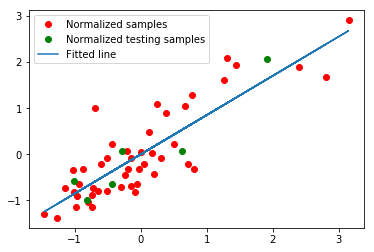

In [3]:

# placeholder for the input

X = tf.placeholder("float")
Y = tf.placeholder("float")


# Set model weights ans bias

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Set parameters
learning_rate = 0.001
training_iteration = 300

# TODO: construct the linear regression
predictions = tf.add(tf.multiply(X, W), b)

# TODO: define the error function -> use the TensorFlow implementation of mean squared error

error_function = tf.losses.mean_squared_error(Y,predictions)

# TODO: Select the GradientDescentOptimizer and create a train op in "optimizer"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error_function) 

# Initialize variables
init = tf.global_variables_initializer()

# Launch a graph
with tf.Session() as sess:
    sess.run(init)

    display_step = 10
    
    # Fit all training data
    for iteration in range(training_iteration):
        
        for (x, y) in zip(x_input_train_n, y_input_train_n):
            _,evaled_error= sess.run([optimizer, error_function], feed_dict={X: x, Y: y})
            
        if iteration % display_step == 0:
            print ("Iteration: "+str(iteration+1)+" Error: "+" "+str(evaled_error))
            
    # Display function and data
    plt.figure()
    plt.plot(x_input_train_n, y_input_train_n, 'ro', label='Normalized samples')
    plt.plot(x_input_test_n, y_input_test_n, 'go', label='Normalized testing samples')
    plt.plot(x_input_train_n, sess.run(predictions,feed_dict={X: x_input_train_n}), label='Fitted line')
    plt.legend()
    
    plt.show()